In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop("Id",axis=1,inplace = True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.shape

(150, 5)

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

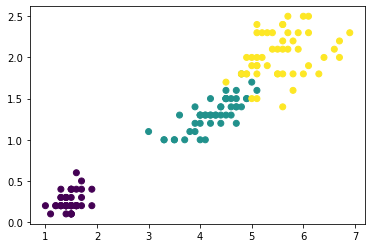

In [11]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],c=iris.Species.values)

In [12]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

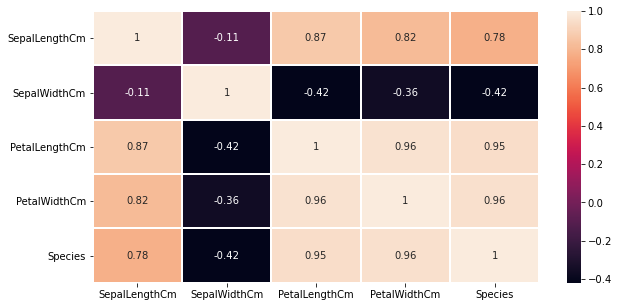

In [13]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),linewidths=1,annot=True)

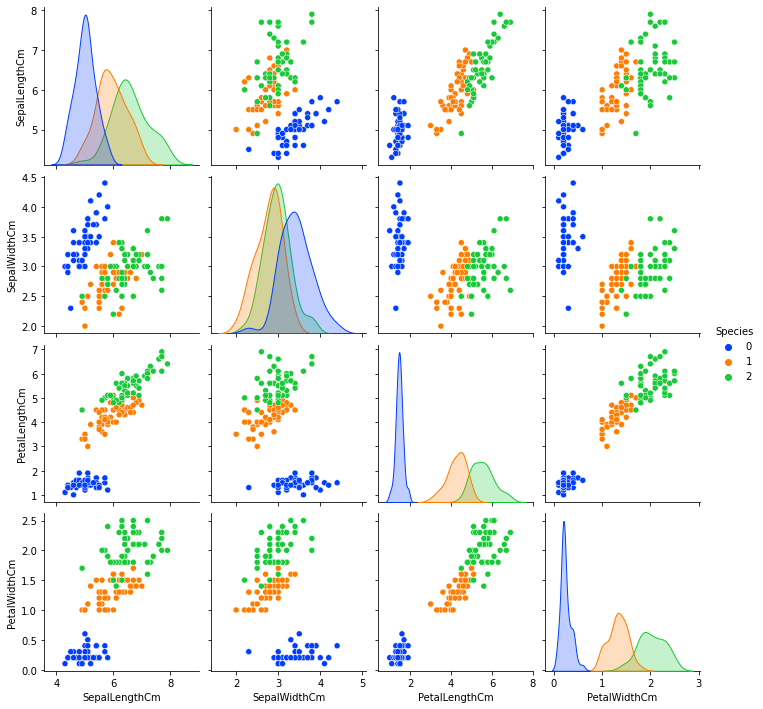

In [16]:
sns.pairplot(iris,hue="Species",palette="bright")

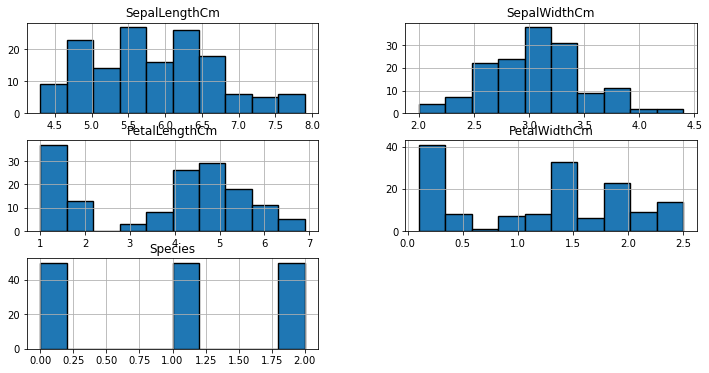

In [18]:
iris.hist(edgecolor='black',linewidth=1.4)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

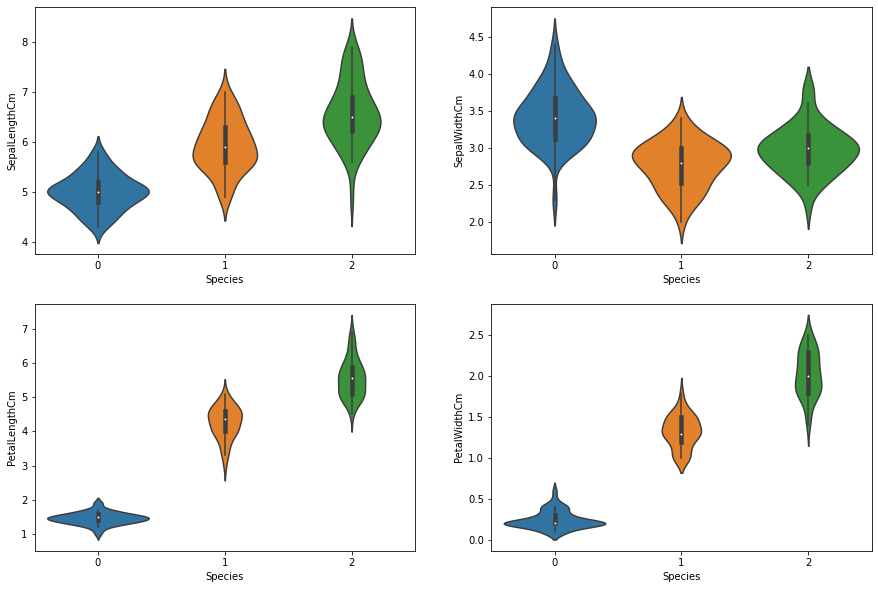

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)


plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)

In [20]:
from sklearn.cluster import KMeans
features=iris.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)
    
wcss

[780.8243999999995,
 179.1222103386809,
 87.31002785114046,
 66.97905140650855,
 50.41949126984125,
 42.77019525844523,
 35.40031968233057,
 31.255435242696116,
 29.076956636348235,
 26.857226362596222]

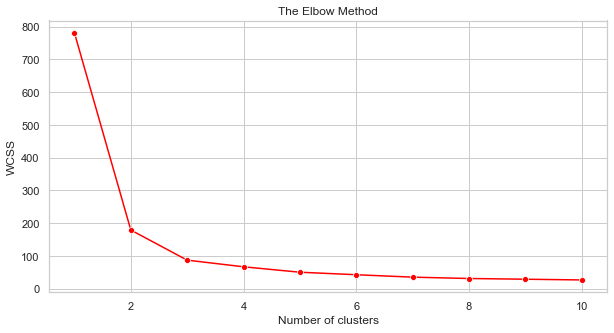

In [21]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans= KMeans(n_clusters=3,init='k-means++',random_state=5)
y_kmeans=kmeans.fit_predict(features)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

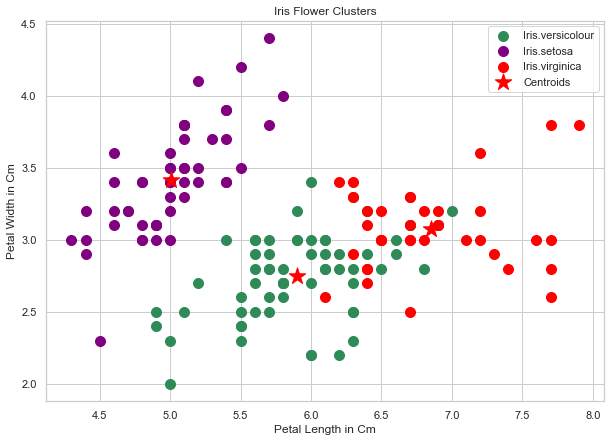

In [23]:
fig=plt.figure(figsize=(10,7))
plt.title('Clusters with Centroids',fontweight='bold',fontsize=20)
plt.scatter(features[y_kmeans==0,0],features[y_kmeans==0,1],s=100,c='seagreen',label='Iris.versicolour')
plt.scatter(features[y_kmeans==1,0],features[y_kmeans==1,1],s=100,c='purple',label='Iris.setosa')
plt.scatter(features[y_kmeans==2,0],features[y_kmeans==2,1],s=100,c='red',label='Iris.virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',marker="*",label='Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in Cm')
plt.xlabel('Petal Length in Cm')
plt.legend()